In [1]:
import pandas as pd
import numpy as np


ratings_cols = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(r"C:\Users\yigit\Downloads\ml-100k\ml-100k\u.data", sep='\t', names=ratings_cols, encoding='latin-1')
ratings.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
item_cols = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)]

movies = pd.read_csv(
    r"C:\Users\yigit\Downloads\ml-100k\ml-100k\u.item",
    sep='|',
    names=item_cols,
    usecols=[0, 1],  
    encoding='latin-1'
)

movies.head()


,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
data = pd.merge(ratings, movies, on='item_id')
data.head()


,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [4]:
ratings_matrix = data.pivot_table(index='user_id', columns='movie_title', values='rating')
ratings_matrix.head()


movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [5]:
print("Unique users:", data['user_id'].nunique())
print("Unique movies:", data['movie_title'].nunique())
print("Average rating:", round(data['rating'].mean(), 2))


Unique users: 943
Unique movies: 1664
Average rating: 3.53


In [6]:
ratings.dtypes
movies.dtypes


item_id         int64
movie_title    object
dtype: object

In [7]:
ratings.describe()


,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
ratings.isnull().sum()
movies.isnull().sum()
data.isnull().sum()


user_id        0
item_id        0
rating         0
timestamp      0
movie_title    0
dtype: int64

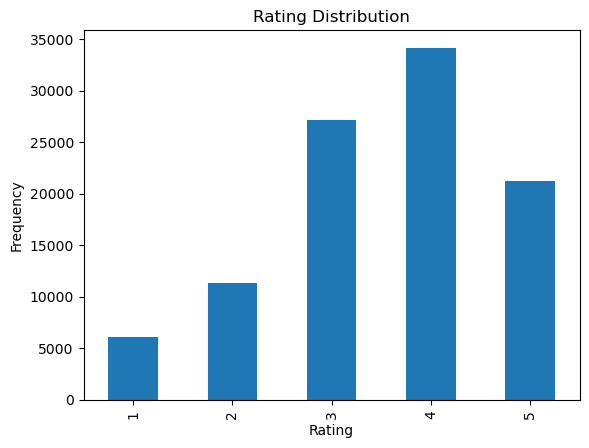

In [9]:
import matplotlib.pyplot as plt

ratings['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


<Axes: >

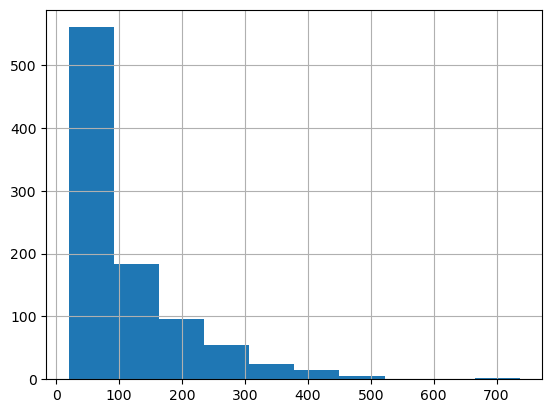

In [10]:
ratings.groupby('user_id')['rating'].count().hist()


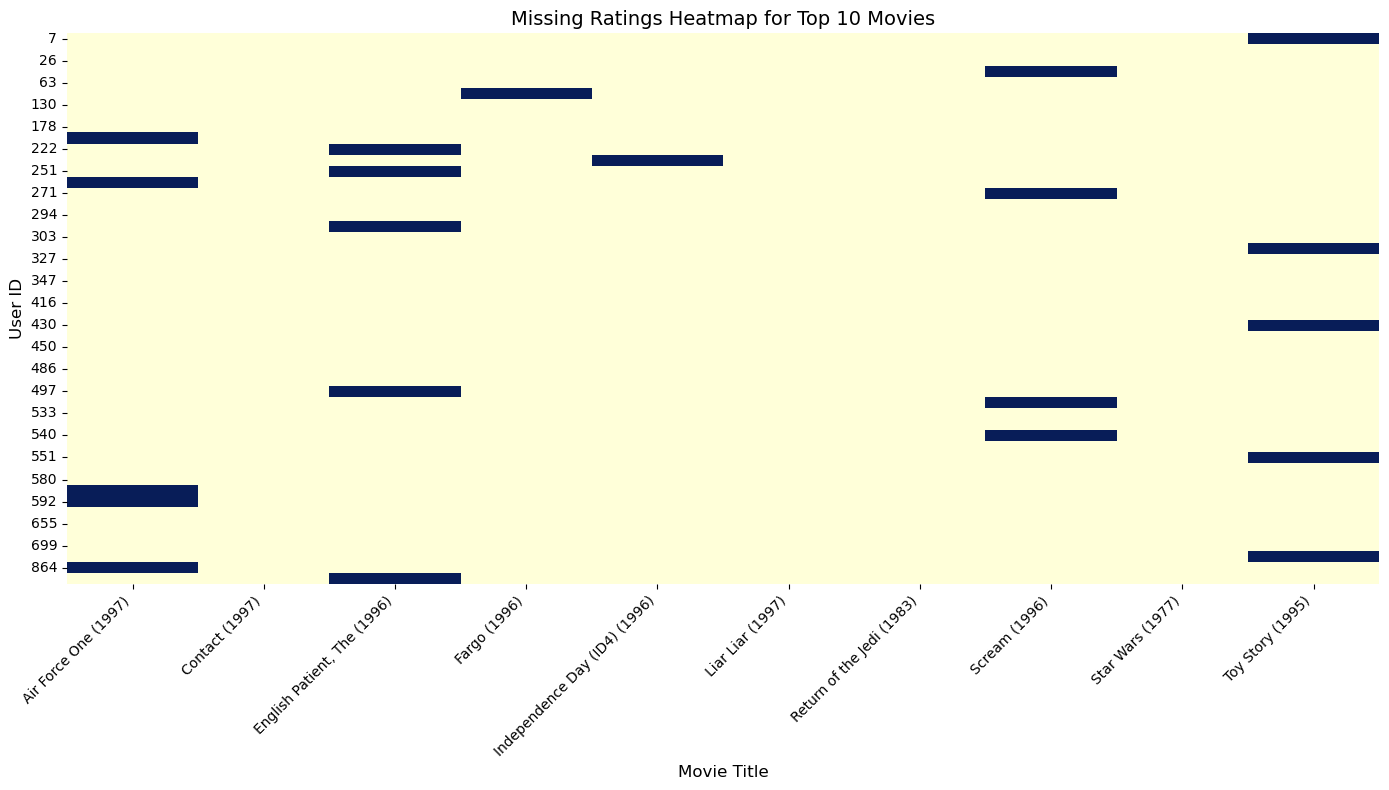

In [11]:

data = pd.merge(ratings, movies[['item_id', 'movie_title']], on='item_id').copy()

top_10_ids = ratings['item_id'].value_counts().head(10).index

top_10_data = data[data['item_id'].isin(top_10_ids)].copy()

top_users = top_10_data['user_id'].value_counts().head(50).index

top_10_data = top_10_data[top_10_data['user_id'].isin(top_users)]

top_matrix = top_10_data.pivot_table(index='user_id', columns='movie_title', values='rating')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(top_matrix.isnull(), cmap='YlGnBu', cbar=False)
plt.title("Missing Ratings Heatmap for Top 10 Movies", fontsize=14)
plt.xlabel("Movie Title", fontsize=12)
plt.ylabel("User ID", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





C:\Users\yigit\AppData\Local\Temp\ipykernel_22096\2037232565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='movie_title', x='rating_count', data=most_rated, palette='Blues_d')


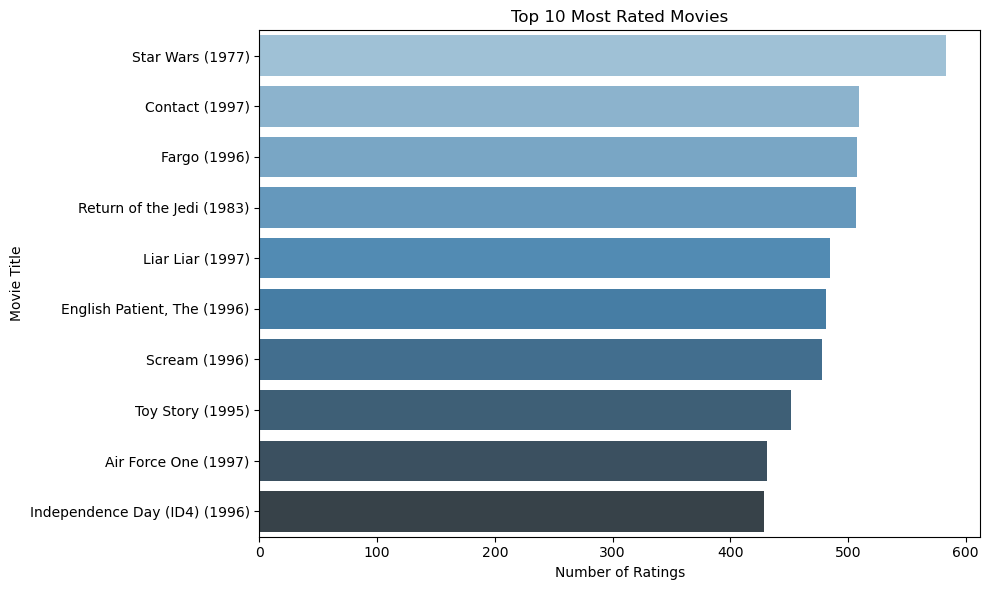

In [12]:

most_rated = ratings['item_id'].value_counts().head(10).reset_index()
most_rated.columns = ['item_id', 'rating_count']
most_rated = most_rated.merge(movies[['item_id', 'movie_title']], on='item_id')

plt.figure(figsize=(10, 6))
sns.barplot(y='movie_title', x='rating_count', data=most_rated, palette='Blues_d')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()



In [13]:
pip install scikit-surprise


In [14]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data_surp = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)
trainset, testset = train_test_split(data_surp, test_size=0.2)


In [15]:
from surprise import SVD
from surprise import accuracy

model = SVD()
model.fit(trainset)


In [16]:
predictions = model.test(testset)
accuracy.rmse(predictions)


RMSE: 0.9319


0.9319473492473234

In [17]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=5, threshold=4.0):
    """Return precision and recall at k metrics for each user"""
    user_est_true = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    for uid, user_ratings in user_est_true.items():
        
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


In [18]:
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4.0)

print(f"Average Precision@5: {round(sum(precisions.values()) / len(precisions), 4)}")
print(f"Average Recall@5: {round(sum(recalls.values()) / len(recalls), 4)}")


Average Precision@5: 0.6436
Average Recall@5: 0.2401


In [19]:
def get_top_n(predictions, n=10):
    from collections import defaultdict
    top_n = defaultdict(list)
    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

top_n = get_top_n(predictions, n=5)


top_n[1]


[(183, 4.843095111144988),
 (64, 4.8093203566162),
 (48, 4.4346090734994315),
 (89, 4.341130948663121),
 (136, 4.136942942560626)]

In [20]:
recommended_ids = [x[0] for x in top_n[1]]
movies[movies['item_id'].isin(recommended_ids)]


,item_id,movie_title
47,48,Hoop Dreams (1994)
63,64,"Shawshank Redemption, The (1994)"
88,89,Blade Runner (1982)
135,136,Mr. Smith Goes to Washington (1939)
182,183,Alien (1979)


In [21]:

recommended_ids = [x[0] for x in top_n[1]] 
recommended_movies = movies[movies['item_id'].isin(recommended_ids)][['movie_title']]
recommended_movies.reset_index(drop=True, inplace=True)

print(" We recommend the following movies for you to watch:\n")
for title in recommended_movies['movie_title']:
    print("✅", title)


 We recommend the following movies for you to watch:

✅ Hoop Dreams (1994)
✅ Shawshank Redemption, The (1994)
✅ Blade Runner (1982)
✅ Mr. Smith Goes to Washington (1939)
✅ Alien (1979)
